# Information 
* Machine Learning Exercise 1
* Shahar Michaeli
* https://www.kaggle.com/shaharmichaeli/

We are going to continue the first exercise in Machine Learninng course for Titanic competition , and try our new technologies and algorithms that we learned.
We want you to use the Titanic passenger data (name, age, price of ticket, etc) to try to predict who will survive and who will die.
The values in the second column ("Survived") used to determine which passenger survived or not.

* if it's a "1", the passenger survived.
* if it's a "0", the passenger died.

We going to use our models to do classifcation about who survived who isn't - Such as KNN,HyperParameters Algorithms (GridSearchCV) , Ensembles (Bagging and Bossting) and etc.

In [1]:
# Section 1 - Imports libraries
import math
from tqdm.auto import tqdm
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import plotly.express as px
import pandas_profiling
import plotly.offline as py
import matplotlib.pyplot as plt
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go
import os


# sklearn imports
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict

# Data Anlysis

In [2]:
# Import dataset
train = pd.read_csv("/kaggle/input/titanic/train.csv")
test = pd.read_csv("/kaggle/input/titanic/test.csv")

In [3]:
test_PassengerId = test['PassengerId']

In [4]:
print("Shape of dataframe : ",train.shape)
print("Columns:",end = " ")
for i in train.columns:
    print(i,end= ", ")

Shape of dataframe :  (891, 12)
Columns: PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, 

### **The shape of the dataset is : 891 observation, 12 different variables.**
1. Survival -	0 = No, 1 = Yes
2. Pclass	 - Ticket class	 - 1 = 1st, 2 = 2nd, 3 = 3rd
3. Sex - Male or female
4. Age - Age in years	
5. Sibsp - Number of siblings / spouses aboard the Titanic	
6. Parch - Number of parents / children aboard the Titanic	
7. Ticket - Ticket number	
8. Fare - Passenger fare	
9. Cabin - Cabin number	
10. Embarked - Port of Embarkation

In [5]:
display(train)

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [6]:
# Pandas profiling is very useful tool to get a lot of information about the dataframe and its Exploratory Data Analysis procces.
report = pandas_profiling.ProfileReport(train)
report_test = pandas_profiling.ProfileReport(test)

# EDA Pands Profile - Train dataframe

In [7]:
display(report)

# EDA Pands Profile - Test dataframe

In [8]:
display(report_test)

# Conclusions from EDA Pandas Profile
* We can understand from Panda Profile that 8.1% (861 cells) from the dataset are missing.
* 72.3% from the observations embarked at Southmapton.
* We can assume as much as age is higher , the siblings / spouses is lower.
* Missing Observations : 20% from Age, 80% from Cabin.
* Most of the passengers into this dataset are male: ~35% of the passengers are female, and ~65% are male
* Age Category is kind of normal distirbution, mean of age is ~30,standard deviation is ~15. The oldest age is 80, against 0.42 age which is baby.
* The "Pclass" column, that informs us about the passenger's ticket class, shows us that ~55% of them are on class 3, ~24% of them are on class 2 and ~21% on class 1.
* According to the "SibSp" column, most of the passengers (~68%) didn't have any spouses or siblings aboard the ship.

In [9]:
# Creating different datasets for survivors and non-survivors
train_survivors = train[train['Survived'] == 1]
train_nonsurvivors = train[train['Survived'] == 0]

In [10]:
train_survivors_sex = train_survivors['Sex'].value_counts()
train_survivors_sex = pd.DataFrame({'Sex':train_survivors_sex.index, 'count':train_survivors_sex.values})

# Taking the count of each Sex value inside the Survivors
train_nonsurvivors_sex = train_nonsurvivors['Sex'].value_counts()
train_nonsurvivors_sex = pd.DataFrame({'Sex':train_nonsurvivors_sex.index, 'count':train_nonsurvivors_sex.values})


# Creating the plotting objects
pie_survivors_sex = go.Pie(  
   labels = train_survivors_sex['Sex'],
   values = train_survivors_sex['count'],
   domain=dict(x=[0, 0.5]),
   name='Survivors',
   hole = 0.5,
   marker = dict(colors=['orange', 'cornflowerblue'], line=dict(color='#000000', width=2))
)

pie_nonsurvivors_sex = go.Pie(  
   labels = train_nonsurvivors_sex['Sex'],
   values = train_nonsurvivors_sex['count'],
   domain=dict(x=[0.5, 1.0]), 
   name='non-Survivors',
   hole = 0.5,
   marker = dict(colors=['cornflowerblue', 'orange'], line=dict(color='#000000', width=2))
)

data = [pie_survivors_sex, pie_nonsurvivors_sex]


# Plot's Layout (background color, title, annotations, etc.)
layout = go.Layout(
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    title='"Sex" percentage from Survivors vs non-Survivors',
    annotations=[dict(text='Survivors', x=0.22, y=0.5, font_size=15, showarrow=False),
                 dict(text='Non-Survivors', x=0.79, y=0.5, font_size=15, showarrow=False)]
)

fig = go.Figure(data=data, layout=layout)

fig.show()

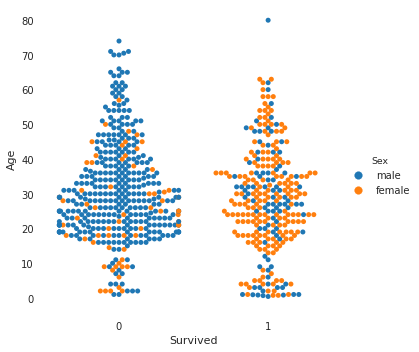

In [11]:
#Categorial variable 'Survived' against age numeric.
sns.catplot(x='Survived',y='Age',hue="Sex",data=train,kind='swarm')

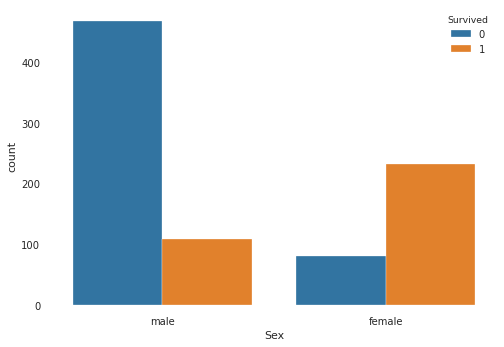

In [12]:
g = sns.countplot(x="Sex",hue="Survived",data=train)

#### Conclusion from Survived and Age and Gender :
* Most of deaths gender are Male ~85.2%.
* Most of the dead are in the 20-30 age range.
* The count of females are higher then males which are survived.


#### Pclass - how it imply about survivors and non survivors?

In [13]:
train_survivors_pclass = train_survivors['Pclass'].value_counts()
train_survivors_pclass = pd.DataFrame({'Pclass':train_survivors_pclass.index, 'count':train_survivors_pclass.values})

# Taking the count of each Pclass value inside the Survivors
train_nonsurvivors_pclass = train_nonsurvivors['Pclass'].value_counts()
train_nonsurvivors_pclass = pd.DataFrame({'Pclass':train_nonsurvivors_pclass.index, 'count':train_nonsurvivors_pclass.values})


b1 = go.Bar(
    x = train_survivors_pclass['Pclass'],
    y = train_survivors_pclass['count'],
    text = "Survived")

b2 = go.Bar(
    x = train_nonsurvivors_pclass['Pclass'],
    y = train_nonsurvivors_pclass['count'],
    text = "Not Survived")
data = [b1,b2]
layout = go.Layout(barmode = "group",title='"Pclass" from Survivors vs non-Survivors')
fig = go.Figure(data = data, layout = layout)

fig.show()

#### Conclusions from Survived Rate against Pclass :
* The highest rate of survive is at first class.
* The highest death rate is at third-class.

#### Embark - how it imply about survivors and non survivors?

In [14]:
#Survived and Embark

survived_embark_not_survived = pd.DataFrame()
survived_embark_not_survived['City'] = ['C','Q','S']
survived_embark_not_survived['Survived'] = ['Not_Survived']*3
survived_embark_not_survived['Amount'] = (list(train[train['Survived'] == 0].groupby('Embarked').agg('count')['Survived']))

survived_embark_survived = pd.DataFrame()
survived_embark_survived['City'] = ['Q','C','S']
survived_embark_survived['Survived'] = ['Survived']*3
survived_embark_survived['Amount'] = (list(train[train['Survived'] == 1].groupby('Embarked').agg('count')['Survived']))


b1 = go.Bar(
    x = survived_embark_not_survived['City'],
    y = survived_embark_not_survived['Amount'],
    text = "Not Survived")
b2 = go.Bar(
    x = survived_embark_survived['City'],
    y = survived_embark_survived['Amount'],
    text = "Survived")
                                           
                                           
data = [b1,b2]
layout = go.Layout(barmode = "group",title='Embarkes - Survivors vs non-Survivors')
fig = go.Figure(data = data, layout = layout)

fig.show()

In [15]:
# Another plot , 2 categorical variables , Survived and Embarked.
#g = sns.countplot(x="Embarked", hue="Survived",data=df)

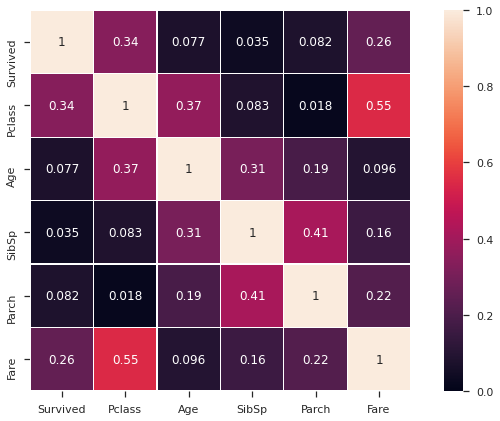

In [16]:
df_to_corr = train.copy()
df_to_corr = df_to_corr.drop(['PassengerId'],axis = 1)

sns.set(style='ticks', color_codes=True)
cor = np.abs(df_to_corr.corr())
plt.figure(figsize=(12, 7))
sns.heatmap(cor,linewidths=0.1,square=True,linecolor='white',annot=True,vmin=0,vmax=1)
plt.show()

### Correlation conclusions
* Pclass has a high correlation with the fare, which makes sense - the first-class cost more, obviously. Also, Pclass has a high correlation with the age, youngest people can't effort ticket for first class.
* Survived has a very high correlation with Pclass, and from the EDA we can assume there is a connection between first class and survived people.
* Survived has a very high correlation with Sex as we saw as before.

## Missing Value (NaN)
Let's plot the perecents of each value with their missing values rate, for test dataframe and train dataframe.

Train Data Frame Missing Value Rate:

Text(0.5, 1.0, 'Mssing Values Ratio - Train Data')

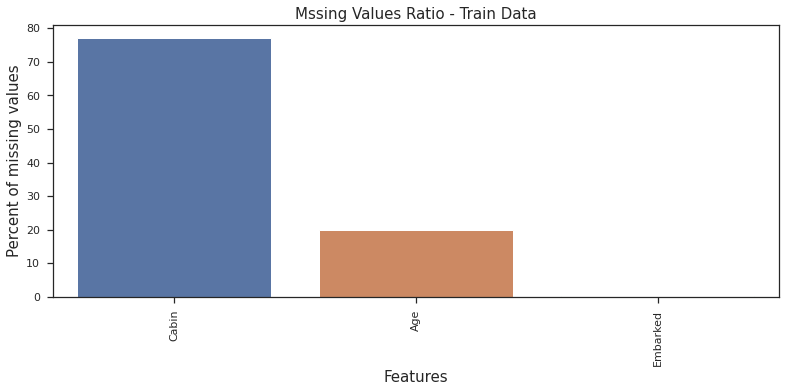

In [17]:
#calculate the missing value ratio of each feature
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]

#plot 
f, ax = plt.subplots(figsize=(13, 5))
plt.xticks(rotation='90')
sns.barplot(x=train_na.index, y=train_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Mssing Values Ratio - Train Data', fontsize=15)

Test Data Frame Missing Value Rate:

Text(0.5, 1.0, 'Mssing Values Ratio - Test Data')

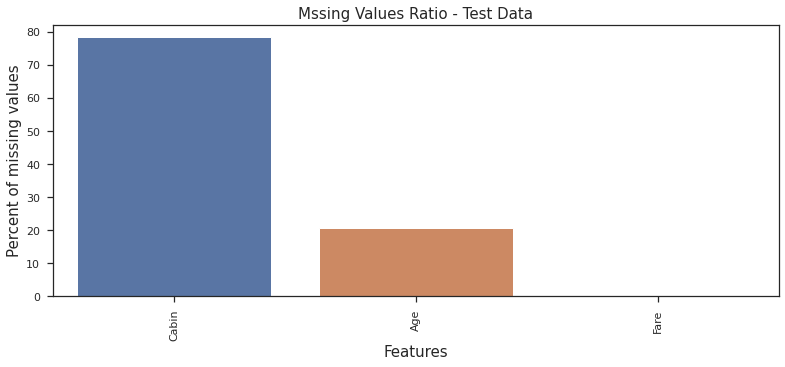

In [18]:
#calculate the missing value ratio of each feature
test_na = (test.isnull().sum() / len(test)) * 100
test_na = test_na.drop(test_na[test_na == 0].index).sort_values(ascending=False)[:30]

#plot 
f, ax = plt.subplots(figsize=(13, 5))
plt.xticks(rotation='90')
sns.barplot(x=test_na.index, y=test_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Mssing Values Ratio - Test Data', fontsize=15)

Embarked feature takes S, Q, C values. Our training dataset has two missing values. Instead of throwing the whole lines , lets fill the most common value, which is S.
Which is doesn't effect on the whole result.

In [19]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

### There is **one** NaN value in test dataframe in 'Fare' feature, we can complete the missing value with the mean of the feature.

In [20]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)

Age features takes numeric values, got a lot of missing values (~19%).
To fill the missing values such as the Embarked feature column , the best option instead drop the lines is to fill with the mean of this column.


In [21]:
age_mean = train['Age'].median(skipna=True)
train['Age'] = train['Age'].fillna(age_mean)

age_mean = test['Age'].median(skipna=True)
test['Age'] = test['Age'].fillna(age_mean)

## Drop, Ticket and Name Cabin Feature
* Cabin has 77.1% missing value and it is one unique value and it doens't provide us a lot information to our model. Cabin feature may be dropped as it is highly incomplete or contains many null values both in training and test dataset.
* Ticket feature may be dropped from our analysis as it contains high ratio of duplicates (22%) and there may not be a correlation between Ticket and survival.
* Same as Ticket as Name.

In [22]:
train = train.drop(['Cabin','Ticket','Name'],axis=1)
test = test.drop(['Cabin','Ticket','Name'],axis=1)

## Create new features from other features

Create new feature , 'FamilySize' , telling about if the passenger was on the boat alone, or with family.
Another feature, 'IsAlone' , indicate who is alone.

In [23]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

test['IsAlone'] = 0
train['IsAlone'] = 0

train.loc[train['FamilySize']==1,'IsAlone'] = 1
test.loc[test['FamilySize']==1,'IsAlone'] = 1

# Feature Selection
We can use Scikit-learn RFECV to use CV and choose the best number of features on this dataset. The default CV is 5-fold cross-validation. We will enter the Scikit-learn RepeatedKFold to repeat each KFold a few times with different splits to be sure about our test.

In [24]:
t = train['Survived'].copy()
X = train.drop(['Survived'], axis=1)

In [25]:
# # find best subset of features on this dataset
# numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
# categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
# all_cols = categorical_cols.tolist() + numerical_cols.tolist()

# # You can do any encoder that you want, but Oridnal doesn't change the columns and it more comfortable.
# # The CT first do the "encoding" and after "standard".
# ct = ColumnTransformer([("encoding", OrdinalEncoder(), categorical_cols),("standard", StandardScaler(), numerical_cols)])

# # prepare train dataframe to RFECV, the data that isn't encoded already not acceptable.
# X_encoded = pd.DataFrame(ct.fit_transform(X,t),)
# selector = RFECV(SGDClassifier(max_iter=10000,random_state=1), min_features_to_select=2,cv=RepeatedKFold(n_repeats=5, random_state=1)).fit(X_encoded,t)

In [26]:
# fig = px.line(x=[i for i in range(1, len(selector.grid_scores_) + 1)], y=selector.grid_scores_)
# fig.update_layout(autosize=False, width=700, height=500)
# fig.show()


In [27]:
# train_best_features = X.loc[:, selector.support_]
# columns = []
# for col in train_best_features.columns:
#     columns.append(col)
    
# print("Number features :" , len(columns))
# print("The best sub features group is: ", columns)



In [28]:
# test = test[columns]
# columns_train = columns+['Survived']
# train = train[columns_train]

# train.reset_index(drop=True, inplace=True)

In [29]:
# t = train['Survived'].copy()
# X = train.drop(['Survived'], axis=1)

## Let's create a method that gets: data and model and returns Accuracy Score and MSE loss

In [30]:
from tqdm.auto import tqdm

def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

In [31]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model, transformer=None, k=None, p=None, show_score_loss_graphs=False, use_pbar=True,name=None,isModel=False):
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])

    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    if use_pbar:
        pbar = tqdm(desc='Computing Models')
        
    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        model.fit(X_train, t_train)

        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_MSE = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_MSE = train_scores_losses_df['loss'].mean()
    
    if show_score_loss_graphs:
        if(isModel == False):
            fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
            fig.show()
            fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val MSE: {mean_val_MSE:.2f}, Mean Train MSE: {mean_train_MSE:.2f}')
            fig.show()
        else:
            fig = px.line(scores_losses_df, x='fold_id', y='score', color='split',height=450,width=800, title=f'{name} - Score By Fold - Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
            fig.show()
            fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split',height=450,width=800, title=f'{name} - Loss By Fold - {mean_val_MSE:.2f}, Mean Train Loss: {mean_train_MSE:.2f}')
            plt.figure(figsize = (8,5))
            fig.show()
        

    return mean_val_score, mean_val_MSE, mean_train_score, mean_train_MSE

# Polynomial Degree
Another thing that we can do to improve our results after we find the best sub features group, is to find the optimal degree

In [32]:
# show graph of score and loss by plynomial degree of numerical features
def show_degree_graphs_cv_train(X, t, model, k=None, p=None, max_degree=10):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    
    val_train_score_loss_df = pd.DataFrame(columns=['degree', 'split', 'score', 'MSE'])
    for i in tqdm(range(1, max_degree), desc='Poly Degree'):
        
        # Here we need only OHE (not dummies) because the split in the cv function encode only 
        # with the train values and sometimes validations have other values , and the encoder doesn't know them.
        # So the attribute of OHE - "handle_unknown" ignore that values.
        ct_enc_std_poly = ColumnTransformer([
            ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
            ("standard_poly", make_pipeline(PolynomialFeatures(degree=i), StandardScaler()), numerical_cols)])
        
        model_pipe = make_pipeline(ct_enc_std_poly, model)
        val_score, val_loss, train_score, train_loss = get_cv_score_and_loss(X, t, model_pipe, k=k, p=p, show_score_loss_graphs=False, use_pbar=False)
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'train', train_score, train_loss]
        val_train_score_loss_df.loc[len(val_train_score_loss_df)] = [i, 'CV', val_score, val_loss]

    fig = px.line(val_train_score_loss_df, x='degree', y='score', color='split')
    fig.show()
    fig = px.line(val_train_score_loss_df, x='degree', y='MSE', color='split')
    fig.show()
    
    # Extract the maximum score
    temp_df = val_train_score_loss_df[val_train_score_loss_df['split'] == 'CV']
    return float(temp_df.loc[temp_df['score'] == temp_df['score'].max(),'degree'])

optimal_degree = show_degree_graphs_cv_train(X, t, SGDClassifier(random_state=1), k=5 ,max_degree=8)

As we can see from the graphs , there is one optimal degree.

In [33]:
print("The optimal degree is:",optimal_degree)

The optimal degree is: 1.0


### Method to Plot GridSearchCV Mean Score by Hyper Parameters

In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

def pooled_var(stds):
    # https://en.wikipedia.org/wiki/Pooled_variance#Pooled_standard_deviation
    n = 5 # size of each group
    return np.sqrt(sum((n-1)*(stds**2))/ len(stds)*(n-1))

def cv_graph_by_hyperparam(gscv,grid_params,name=None):
    df = pd.DataFrame(gscv.cv_results_)
    results = ['mean_test_score',
           'mean_train_score',
           'std_test_score', 
           'std_train_score']
    
    if(len(grid_params) == 1):
        fig, axes = plt.subplots(1, len(grid_params),figsize = (6*len(grid_params),5),sharey='row')
        for idx, (param_name, param_range) in enumerate(grid_params.items()):
            axes.set_ylabel("Mean Score", fontsize=15)
            grouped_df = df.groupby(f'param_{param_name}')[results]\
                .agg({'mean_train_score': 'mean',
                      'mean_test_score': 'mean',
                      'std_train_score': pooled_var,
                      'std_test_score': pooled_var})

            previous_group = df.groupby(f'param_{param_name}')[results]
            axes.set_xlabel(param_name, fontsize=15)
            axes.set_ylim(0.0, 1.1)
            lw = 2
            axes.plot(param_range, grouped_df['mean_train_score'], label="Training score",
                        color="darkorange", lw=lw)
            axes.fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                            grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
                            color="darkorange", lw=lw)
            axes.plot(param_range, grouped_df['mean_test_score'], label="Cross-validation score",
                        color="navy", lw=lw)
            axes.fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                            grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                            color="navy", lw=lw)

    else:
        fig, axes = plt.subplots(1, len(grid_params),figsize = (5*len(grid_params),4),sharey='row')
        axes[0].set_ylabel("Mean Score", fontsize=15)
        for idx, (param_name, param_range) in enumerate(grid_params.items()):
            grouped_df = df.groupby(f'param_{param_name}')[results]\
                .agg({'mean_train_score': 'mean',
                      'mean_test_score': 'mean',
                      'std_train_score': pooled_var,
                      'std_test_score': pooled_var})

            previous_group = df.groupby(f'param_{param_name}')[results]
            axes[idx].set_xlabel(param_name, fontsize=15)
            axes[idx].set_ylim(0.0, 1.1)
            lw = 2
            axes[idx].plot(param_range, grouped_df['mean_train_score'], label="Training score",
                        color="darkorange", lw=lw)
            axes[idx].fill_between(param_range,grouped_df['mean_train_score'] - grouped_df['std_train_score'],
                            grouped_df['mean_train_score'] + grouped_df['std_train_score'], alpha=0.2,
                            color="darkorange", lw=lw)
            axes[idx].plot(param_range, grouped_df['mean_test_score'], label="Cross-validation score",
                        color="navy", lw=lw)
            axes[idx].fill_between(param_range, grouped_df['mean_test_score'] - grouped_df['std_test_score'],
                            grouped_df['mean_test_score'] + grouped_df['std_test_score'], alpha=0.2,
                            color="navy", lw=lw)
    
    if(len(grid_params) == 1):
        handles, labels = axes.get_legend_handles_labels()
    else:
        handles, labels = axes[0].get_legend_handles_labels()
    fig.suptitle('GridSearchCV Score', fontsize=20)
    fig.legend(handles, labels, loc=8, ncol=2, fontsize=10)

    fig.subplots_adjust(bottom=0.25, top=0.75)  
    plt.show()

# Hyper Parameters Search 
We want to our model, SGDClassifier, to fit the best hyperparameters to calssification. GridCV is more accurate then RandomCV and that's what we going to use. Its maybe take longer time but it worth it.
We will use ReaptedCV to be sure that is the optimal hyperparameters, even if GridCV is use 5-KFold by himself as defualt.

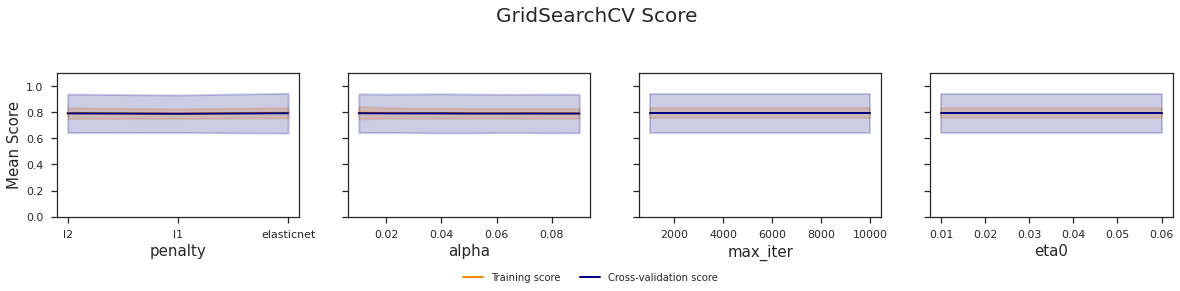

Best hyperparameters: {'alpha': 0.04, 'eta0': 0.01, 'max_iter': 1000, 'penalty': 'l2'}


In [35]:
# train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV

MAX_ALPHA = 10 # 0.01 to 0.1
MAX_LEARNING_RATE = 7 # 0.01 to 0.07

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns

ct = ColumnTransformer([
            ("encoding", OneHotEncoder(sparse=False, handle_unknown='ignore'), categorical_cols),
            ("standard_poly", make_pipeline(PolynomialFeatures(degree=int(optimal_degree)), StandardScaler()), numerical_cols)])

X_encoded = pd.DataFrame(ct.fit_transform(X,t),)
np.random.seed(1)
hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha': [x/100 for x in range(1,MAX_ALPHA)],'max_iter':[1000,2000,5000,10000],'eta0':[x/100 for x in range(1,MAX_LEARNING_RATE)]}

gs_model = GridSearchCV(SGDClassifier(random_state=1), hyper_parameters, cv=RepeatedKFold(n_splits=5, n_repeats=2, random_state=1),return_train_score=True).fit(X_encoded, t)
cv_graph_by_hyperparam(gs_model,hyper_parameters)
print('Best hyperparameters:', gs_model.best_params_)

In [36]:
optimal_alpha = gs_model.best_params_['alpha']
optimal_eta0 = gs_model.best_params_['eta0']
optimal_penalty = gs_model.best_params_['penalty']
optimal_max_iter = gs_model.best_params_['max_iter']

# Ensembles

## Bagging 
We create a few bags of samples from the original dataset by seperate them with KFold, We train a model on each of the bags of samples, and we return the combined score.
Another bagging ensemble is Bootstrap - we draw randomaly samples out of the dataset (with replacement) and train the model on each group of samples.
We save all the models and use them as an ensemble.



In [37]:
estimator = SGDClassifier(eta0 = optimal_eta0,alpha = optimal_alpha,penalty=optimal_penalty,max_iter = optimal_max_iter,random_state=1)

In [38]:
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
de = OneHotEncoder(drop="first", sparse=False)
oe = OrdinalEncoder()

Best Params :  {'bootstrap': True, 'n_estimators': 2}


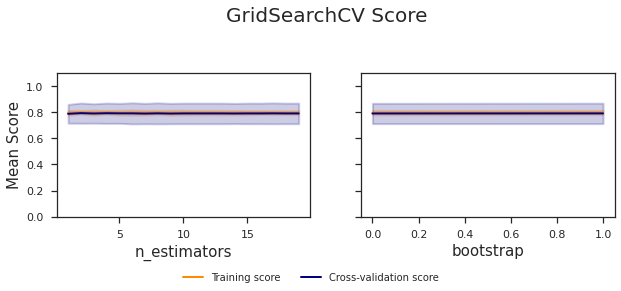

<Figure size 576x360 with 0 Axes>

In [39]:
def encoder_test_bg(encoder):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    ct = ColumnTransformer([("encoding", encoder, categorical_cols),("standard_poly", make_pipeline(PolynomialFeatures(degree=int(optimal_degree)), StandardScaler()),numerical_cols)]) 
    
    X_enc = pd.DataFrame(ct.fit_transform(X,t),)
    test_enc = pd.DataFrame(ct.transform(test),)
    
    hyper_parameters = {'n_estimators': list(range(1, 20)),'bootstrap':[False,True]}
    GSV_bg = GridSearchCV(BaggingClassifier(base_estimator=estimator,n_estimators=20, random_state=1), hyper_parameters,return_train_score=True).fit(X_enc, t)
    print('Best Params : ',GSV_bg.best_params_)
    cv_graph_by_hyperparam(GSV_bg,hyper_parameters)
    bootstrap_bool = GSV_bg.best_params_['bootstrap']
    n_estimators_bg = GSV_bg.best_params_['n_estimators']
    
    bag_model = BaggingClassifier(base_estimator=estimator, n_estimators=n_estimators_bg, random_state=1, bootstrap=bootstrap_bool).fit(X_enc,t)
    get_cv_score_and_loss(X_enc, t, bag_model, transformer=None, k=10, p=None, show_score_loss_graphs=True, use_pbar=False,name='Bagging Model',isModel=True)
    return bag_model.predict(test_enc)
    
y_bg_test_ohe = encoder_test_bg(ohe)
# y_bg_test_de  = encoder_test_bg(de)
# y_bg_test_oe  = encoder_test_bg(oe)

## Submissions - Bagging





In [40]:
# sub_bag_ohe = pd.DataFrame()
# sub_bag_ohe['PassengerId'] = test_PassengerId
# sub_bag_ohe['Survived'] = y_bg_test_ohe
# sub_bag_ohe.to_csv('./sub_bag_ohe.csv',index=False)

# sub_bag_de = pd.DataFrame()
# sub_bag_de['PassengerId'] = test_PassengerId
# sub_bag_de['Survived'] = y_bg_test_de
# sub_bag_de.to_csv('./sub_bag_de.csv',index=False)

# sub_bag_oe = pd.DataFrame()
# sub_bag_oe['PassengerId'] = test_PassengerId
# sub_bag_oe['Survived'] = y_bg_test_oe
# sub_bag_oe.to_csv('./sub_bag_oe.csv',index=False)

As we can see, the score is getting better then the exercise one's score - so this is good for us. 
![image](https://user-images.githubusercontent.com/49268387/103195386-d7807800-48ea-11eb-9e29-dcebd264d7b7.png)


## Boosting
We take the samples that the model predicted incorrectly and multiply them (thus giving them more weight in the next training).
We do this until we have few models, each of them is an expert on some type of samples.
We combine all the model's predictions and return a combined score.



Best Params :  {'n_estimators': 100}


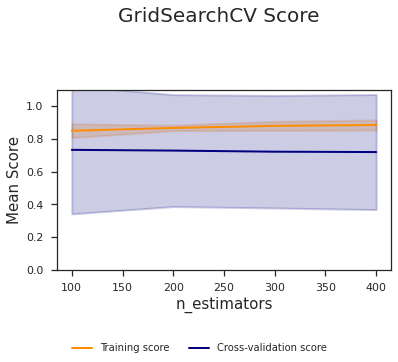

<Figure size 576x360 with 0 Axes>

In [41]:
def encoder_test_ada(encoder):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    ct = ColumnTransformer([("encoding", encoder, categorical_cols),("standard_poly", make_pipeline(PolynomialFeatures(degree=int(optimal_degree)), StandardScaler()),numerical_cols)]) 
    
    X_enc = pd.DataFrame(ct.fit_transform(X,t),)
    test_enc = pd.DataFrame(ct.transform(test),)
    
    hyper_parameters = {'n_estimators': list(range(100, 500,100))}
    GSV_Ada = GridSearchCV(AdaBoostClassifier(n_estimators=100, random_state=1), hyper_parameters,return_train_score=True).fit(X_enc, t)
    print('Best Params : ',GSV_Ada.best_params_)
    cv_graph_by_hyperparam(GSV_Ada,hyper_parameters)
    optimal_num_estimators = GSV_Ada.best_params_['n_estimators']
    
    ada_boost_model = AdaBoostClassifier(n_estimators=optimal_num_estimators, random_state=1).fit(X_enc, t)
    get_cv_score_and_loss(X_enc, t, ada_boost_model, transformer=None, k=10, p=None, show_score_loss_graphs=True, use_pbar=False,name='Boosting Model',isModel=True)
    return ada_boost_model.predict(test_enc)
    
y_test_ada_ohe = encoder_test_ada(ohe)
# y_test_ada_de  = encoder_test_ada(de)
# y_test_ada_oe  = encoder_test_ada(oe)

## Submissions - ADA Boosting

In [42]:
# sub_ada_ohe = pd.DataFrame()
# sub_ada_ohe['PassengerId'] = test_PassengerId
# sub_ada_ohe['Survived'] = y_test_ada_ohe
# sub_ada_ohe.to_csv('./sub_ada_ohe.csv',index=False)

# sub_ada_de = pd.DataFrame()
# sub_ada_de['PassengerId'] = test_PassengerId
# sub_ada_de['Survived'] = y_test_ada_de
# sub_ada_de.to_csv('./sub_ada_de.csv',index=False)

# sub_ada_oe = pd.DataFrame()
# sub_ada_oe['PassengerId'] = test_PassengerId
# sub_ada_oe['Survived'] = y_test_ada_oe
# sub_ada_oe.to_csv('./sub_ada_oe.csv',index=False)

As you can see, all the encoders has the same score for the predictions and the score is the same as Baggging boosting.

![image](https://user-images.githubusercontent.com/49268387/103364693-2125ba00-4ac7-11eb-9f0e-00fa70b24cb3.png)

To ADA Boost Ensemble and Bagging Ensemble have the same mean score , but on the Cross Valdiation graph, we can see Bagging Ensemble achieved one time to 0.9 score.
As we can see, after we submit the predictions we can see that Bagging Ensemble is better in the submission's score then ADA Boost.

# KNN
We can create a model that predicts only based on the closest training samples to a test sample, this model is called K Nearest Neighbors.
We can choose the k and the model will calculate the prediction for each test sample, based on the closest k training samples to the test sample.
We will determine the meaning of close which will be Euclidean distance.
![](https://user-images.githubusercontent.com/41818563/102157561-61125d80-3e88-11eb-88d5-940c86b25cbf.png)

Best Params :  {'n_neighbors': 10}


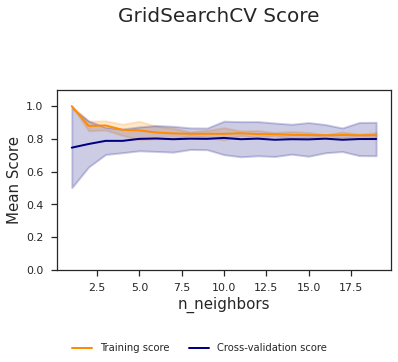

<Figure size 576x360 with 0 Axes>

In [43]:
def encoder_test_knn(encoder):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    ct = ColumnTransformer([("encoding", encoder, categorical_cols),
                            ("standard_poly", make_pipeline(PolynomialFeatures(degree=int(optimal_degree)), StandardScaler()),numerical_cols)]) 
    
    X_enc = pd.DataFrame(ct.fit_transform(X,t),)
    test_enc = pd.DataFrame(ct.transform(test),)
    
    hyper_parameters = {'n_neighbors': list(range(1, 20))}
    gs_neigh_model = GridSearchCV(KNeighborsClassifier(n_neighbors=5), hyper_parameters,return_train_score=True).fit(X_enc, t)
    print('Best Params : ',gs_neigh_model.best_params_)
    cv_graph_by_hyperparam(gs_neigh_model,hyper_parameters)
    optimal_number_neighbors = gs_neigh_model.best_params_['n_neighbors'] 
    knn_model = KNeighborsClassifier(n_neighbors=optimal_number_neighbors).fit(X_enc,t)
    get_cv_score_and_loss(X_enc, t, knn_model, transformer=None, k=10, p=None, show_score_loss_graphs=True, use_pbar=False,name='KNN Model',isModel=True)

    return knn_model.predict(test_enc)
    
y_test_knn_ohe = encoder_test_knn(ohe)
# y_test_knn_de  = encoder_test_knn(de)
# y_test_knn_oe  = encoder_test_knn(oe)

In [44]:
# sub_knn_ohe = pd.DataFrame()
# sub_knn_ohe['PassengerId'] = test_PassengerId
# sub_knn_ohe['Survived'] = y_test_knn_ohe
# sub_knn_ohe.to_csv('./sub_knn_ohe.csv',index=False)

# sub_knn_de = pd.DataFrame()
# sub_knn_de['PassengerId'] = test_PassengerId
# sub_knn_de['Survived'] = y_test_knn_de
# sub_knn_de.to_csv('./sub_knn_de.csv',index=False)

# sub_knn_oe = pd.DataFrame()
# sub_knn_oe['PassengerId'] = test_PassengerId
# sub_knn_oe['Survived'] = y_test_knn_oe
# sub_knn_oe.to_csv('./sub_knn_oe.csv',index=False)

We can see from the GridSearachCV the number of neighbors that give us the highest valdiation score is 10, so we will use it on the submission.

## Submission - KNNClassifier
KNN Classifier has lower percise then Bagging and Boosting ensembles, and also it's lower score then the score in exercise one.
![image](https://user-images.githubusercontent.com/49268387/103195607-478efe00-48eb-11eb-96ce-54d2fa18110c.png)


 # SGDClassifier
 After we found the optimal hyperparameters , we will try to submit and we will see the scores Kaggle give us.
 SGDClassifier is the default algorithm to classification in our course of machine Learning, so I saved it for the end.

### Confusion Matrix 
As we have requested to do , I will present the confusion matrix for SGDClassifier and calculate the KPIs.
We want to be able to explain the results of a classifier.
When talking about binary classification, the classification type of a sample can be one out of four:

1. TP (True Positive) - The model classified correctly that a sample is positive.
2. TN (True Negative) - The model classified correctly that a sample is negative.
3. FP (False Positive) - The model classified a sample as positive but the sample is actually negative.
4. FN (False Negative) - The model classified a sample as negative but the sample is actually positiv
We will use these methods to calculate Recall, Specifity , Percision , FPR and Accuracy.
In our competition is Accuracy, so we will focus on that.

Note : I choosed to do confusion matrix only for SGDClassifier becuase it give us the heighest score in submission then KNN and Ensembles.
Our competition score is about the Accuracy, so for all of them it will be the same Accuracy. (Conclusion from the submisions and desire for save alot of rows of code)



In [45]:
# calculate precision, recall, specificity, fpr and accuracy
def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp/(tp+fn)

def specificity(cm):
    tn, fp, fn, tp = cm.ravel()
    return tn/(tn+fp)

def fpr(cm):
    tn, fp, fn, tp = cm.ravel()
    return fp/(fp+tn)

def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    return (tp+tn)/(tp+tn+fp+fn)

In [46]:
def make_cm_plot_and_print_kpi(y,t):
    cm = confusion_matrix(y,t)
    sns.set(font_scale=2)
    plt.figure(figsize = (8,5))
    fig = sns.heatmap(cm, annot=True, cmap=plt.cm.Pastel1, fmt='g')
    fig.set_title("Conusion Matrix")
    fig.set_ylabel("True")
    fig.set_xlabel("Predicted")
    plt.show()
    print(f'Train: precision {precision(cm):.2f}, recall {recall(cm):.2f}, specificity {specificity(cm):.2f}, fpr {fpr(cm):.2f}, accuracy {accuracy(cm):.2f}')

In [47]:
t = train['Survived'].copy()
X = train.drop(['Survived'], axis=1)

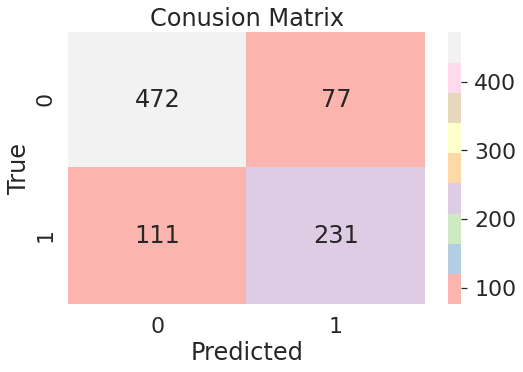

Train: precision 0.75, recall 0.68, specificity 0.86, fpr 0.14, accuracy 0.79


<Figure size 576x360 with 0 Axes>

In [48]:
def encoder_test(encoder):
    numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
    model = SGDClassifier(eta0 = optimal_eta0,alpha = optimal_alpha,penalty=optimal_penalty,max_iter = optimal_max_iter,random_state=1)
    
    ct = ColumnTransformer([("encoding", encoder, categorical_cols),("standard_poly", make_pipeline(PolynomialFeatures(degree=int(optimal_degree)), StandardScaler()), numerical_cols)])
    
    #Confusion Matrix On CV
    SGD_for_cm = make_pipeline(ct,model)
    y_pred = cross_val_predict(SGD_for_cm, X, t)
    make_cm_plot_and_print_kpi(t,y_pred)
   
    #CV Graph
    get_cv_score_and_loss(X, t, make_pipeline(ct,model), transformer=None, k=10, p=None, show_score_loss_graphs=True, use_pbar=False,name='SGDClassifier Model',isModel=True)
    
    #SGD_for_submit = make_pipeline(ct,model).fit(X,t)
    #return SGD_for_submit.predict(test)

y_test_sgd_ohe = encoder_test(ohe)
# OHE and DE the most percise for our competition and have the same score in submssion, I will stay only with OHE .
# y_test_sgd_de  = encoder_test(de)
# y_test_sgd_oe  = encoder_test(oe)

SGDClassifier is the most stable model in this exercise, as we can see 70 percent of the validation score is higher then 0.8 accuracy, so we can assume SGDClassifier will give the best result of all models.

## Submission - SGDClassifer


In [49]:
# sub_ohe = pd.DataFrame()
# sub_ohe['PassengerId'] = test_PassengerId
# sub_ohe['Survived'] = y_test_sgd_ohe
# sub_ohe.to_csv('./sub_ohe.csv',index=False)

# sub_de = pd.DataFrame()
# sub_de['PassengerId'] = test_PassengerId
# sub_de['Survived'] = y_test_sgd_de
# sub_de.to_csv('./sub_de.csv',index=False)

# sub_oe = pd.DataFrame()
# sub_oe['PassengerId'] = test_PassengerId
# sub_oe['Survived'] = y_test_sgd_oe
# sub_oe.to_csv('./sub_oe.csv',index=False)

As we can see SGD Classifier give us the same score as the ensembels, but Ordinal Encoder has lower score then the others.
![image](https://user-images.githubusercontent.com/49268387/103366431-4a484980-4acb-11eb-88cd-fa3b74605f02.png)

As I said in the summary, I decided to pass the Feature Selection because the results was very not percise to our competition.
The Resaults were :
- Ensembles
![image](https://user-images.githubusercontent.com/49268387/103196054-27ac0a00-48ec-11eb-91d1-c6b706a11be2.png)
- SGD Classifier
![image](https://user-images.githubusercontent.com/49268387/103196135-490cf600-48ec-11eb-8ee0-db492eb1f355.png)

## Submission - Best  Score in Exercise 1
score 0.745
We see that classification with the new features bring us as the same loss like before, kaggle brought us a smaller result - 
The CE is better now , but the score from kaggle was lower.
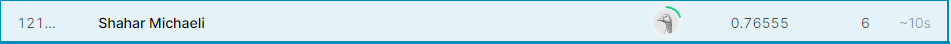

# Summary

This was the third exercise , which is a continue to the first one. We asked to improve our models with features selection, find the best hyperparameters (with GridSearchCV) and try anothers models such as ensembles and KNN. For each we found the best hyperparameters and we made a model to predict the test values.
Feature selection didn't succesed so much - it just found that only 'Pclass' is the best to predict , which is impossible - so I decided to pass it.

Another thing that I should say here, from the CV graphs we can infer that Bagging ensemble probably will reached high score in the submission , as a resault from the highest score (~0.9) , even though the ADA Boost Ensemble had barely reached to ~0.85.
I choosed to do confusion matrix only for SGDClassifier becuase it give us the hieghest score in submission then  KNN and Ensembles.
Our competition score is about the Accuracy, so for all of them it will be the lower Accuracy. (Conclusion from the submisions).

## Best Position
All the new algorithms and methods have resulted in improvement results, my best position were at 9126th place.
![image](https://user-images.githubusercontent.com/49268387/103196231-73f74a00-48ec-11eb-9166-35493f6911bc.png)


# References
* Aviad's notebooks from the excercises
